<a href="https://colab.research.google.com/github/vedangit/Dental-Disease-Prediction/blob/main/dentist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_directory = '/content/drive/MyDrive/aies'

In [ ]:
import os


# Function to print directory structure recursively
def print_directory_structure(directory):
    for root, dirs, files in os.walk(directory):
        level = root.replace(directory, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 4 * (level + 1)
        for file in files:
            pass

# Print directory structure
print_directory_structure(data_directory)


aies/
    test/
    train/
    valid/


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # for loading the image
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [ ]:
df_valid = pd.read_csv('/content/drive/MyDrive/aies/valid/_annotations.csv')
df_valid.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,0355_jpg.rf.e3e6daab192a51e715ef9fc3394f2a76.jpg,512,256,Fillings,186,85,209,129
1,0355_jpg.rf.e3e6daab192a51e715ef9fc3394f2a76.jpg,512,256,Fillings,167,93,188,128
2,0355_jpg.rf.e3e6daab192a51e715ef9fc3394f2a76.jpg,512,256,Fillings,143,93,170,130
3,0355_jpg.rf.e3e6daab192a51e715ef9fc3394f2a76.jpg,512,256,Fillings,127,132,155,182
4,0355_jpg.rf.e3e6daab192a51e715ef9fc3394f2a76.jpg,512,256,Implant,313,85,330,123


The annotation data have multiple rows for one image means that one image contain more that one classes <br>
After getting the corresponding cropped image according to a unique row and corresponding image the size will be different so there is a need to filter low area images for further processing as there are images with 0 area such that either width or height is zero

In [ ]:
# There is a need to find the optimum width and heigth of cropped image
df_valid['cropped_image_width'] = df_valid['xmax']-df_valid['xmin']
df_valid['cropped_image_height'] = df_valid['ymax']-df_valid['ymin']
df_valid['Area'] = df_valid['cropped_image_width']*df_valid['cropped_image_height']
df_valid.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,cropped_image_width,cropped_image_height,Area
0,0355_jpg.rf.e3e6daab192a51e715ef9fc3394f2a76.jpg,512,256,Fillings,186,85,209,129,23,44,1012
1,0355_jpg.rf.e3e6daab192a51e715ef9fc3394f2a76.jpg,512,256,Fillings,167,93,188,128,21,35,735
2,0355_jpg.rf.e3e6daab192a51e715ef9fc3394f2a76.jpg,512,256,Fillings,143,93,170,130,27,37,999
3,0355_jpg.rf.e3e6daab192a51e715ef9fc3394f2a76.jpg,512,256,Fillings,127,132,155,182,28,50,1400
4,0355_jpg.rf.e3e6daab192a51e715ef9fc3394f2a76.jpg,512,256,Implant,313,85,330,123,17,38,646


In [ ]:
df_valid.columns

Index(['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax',
       'cropped_image_width', 'cropped_image_height', 'Area'],
      dtype='object')

In [ ]:
df_valid = df_valid[(df_valid.Area >= df_valid.Area.quantile(0.25)) & (df_valid.Area <= df_valid.Area.quantile(0.75))]

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/aies/test/_annotations.csv')
# There is a need to find the optimum width and heigth of cropped image
df_test['cropped_image_width'] = df_test['xmax']-df_test['xmin']
df_test['cropped_image_height'] = df_test['ymax']-df_test['ymin']
df_test['Area'] = df_test['cropped_image_width']*df_test['cropped_image_height']
# Filter the Data to select the interquartile data only(Area 25th to 75th percentile)
# You may use different range but obective is to not include the minimum areas

df_test = df_test[(df_test.Area >= df_test.Area.quantile(0.25)) & (df_test.Area <= df_test.Area.quantile(0.75))]
df_test.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,cropped_image_width,cropped_image_height,Area
5,0136_jpg.rf.03e2aec8ec77594665dd1abc68d47bd3.jpg,512,256,Fillings,164,158,195,197,31,39,1209
8,0136_jpg.rf.03e2aec8ec77594665dd1abc68d47bd3.jpg,512,256,Fillings,331,111,354,150,23,39,897
9,0136_jpg.rf.03e2aec8ec77594665dd1abc68d47bd3.jpg,512,256,Fillings,310,110,332,152,22,42,924
10,0136_jpg.rf.03e2aec8ec77594665dd1abc68d47bd3.jpg,512,256,Fillings,185,111,204,152,19,41,779
13,0507_jpg.rf.07ca548c6eb4f61c76f1629e7bc26fa4.jpg,512,256,Fillings,251,91,272,148,21,57,1197


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/aies/train/_annotations.csv')

# There is a need to find the optimum width and heigth of cropped image
df_train['cropped_image_width'] = df_train['xmax']-df_train['xmin']
df_train['cropped_image_height'] = df_train['ymax']-df_train['ymin']
df_train['Area'] = df_train['cropped_image_width']*df_train['cropped_image_height']
# Filter the Data to select the interquartile data only(Area 25th to 75th percentile)
# You may use different range but obective is to not include the minimum areas

df_train = df_train[(df_train.Area >= df_train.Area.quantile(0.25)) & (df_train.Area <= df_train.Area.quantile(0.75))]
df_train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,cropped_image_width,cropped_image_height,Area
0,0674_jpg.rf.e02a155a0c135687b9301ff9a20d220a.jpg,512,256,Implant,175,116,206,153,31,37,1147
3,0674_jpg.rf.e02a155a0c135687b9301ff9a20d220a.jpg,512,256,Implant,302,126,329,175,27,49,1323
4,0674_jpg.rf.e02a155a0c135687b9301ff9a20d220a.jpg,512,256,Implant,335,114,360,154,25,40,1000
7,0674_jpg.rf.e02a155a0c135687b9301ff9a20d220a.jpg,512,256,Fillings,311,58,330,109,19,51,969
13,0271_jpg.rf.e18d2d727c6d0c029f5b6024f39058d6.jpg,512,256,Fillings,140,114,161,164,21,50,1050


In [ ]:
df_train.isnull().sum()

filename                0
width                   0
height                  0
class                   0
xmin                    0
ymin                    0
xmax                    0
ymax                    0
cropped_image_width     0
cropped_image_height    0
Area                    0
dtype: int64

In [ ]:
dirname = '/content/drive/MyDrive/aies/test'
filenames = [filename for filename in os.listdir(dirname) if filename.endswith(".jpg")]
image_list = []
label_list = []
# Define the desired image size
desired_width = 50
desired_height = 50
for filename in filenames:
    img_df = df_test[df_test.filename == filename]
    image = cv2.imread(os.path.join(dirname,filename))
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Iterate over each row in the dataframe
    for index, row in img_df.iterrows():
        # Extract crop parameters
        xmin = row['xmin']
        xmax = row['xmax']
        ymin = row['ymin']
        ymax = row['ymax']
        # Crop the image
        cropped_image = gray_image[ymin:ymax, xmin:xmax]
        # Resize the cropped image
        resized_image = cv2.resize(cropped_image, (desired_width, desired_height))
        image_list.append(resized_image)
        label_list.append(row['class'])
image_list_test = np.array(image_list)
label_list_test = np.array(label_list)
print(image_list_test.shape)
print(label_list_test.shape)

(237, 50, 50)
(237,)


In [ ]:
dirname = '/content/drive/MyDrive/aies/valid'
filenames = [filename for filename in os.listdir(dirname) if filename.endswith(".jpg")]
image_list = []
label_list = []
# Define the desired image size
desired_width = 50
desired_height = 50
for filename in filenames:
    img_df = df_valid[df_valid.filename == filename]
    image = cv2.imread(os.path.join(dirname,filename))
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Iterate over each row in the dataframe
    for index, row in img_df.iterrows():
        # Extract crop parameters
        xmin = row['xmin']
        xmax = row['xmax']
        ymin = row['ymin']
        ymax = row['ymax']
        # Crop the image
        cropped_image = gray_image[ymin:ymax, xmin:xmax]
        # Resize the cropped image
        resized_image = cv2.resize(cropped_image, (desired_width, desired_height))
        image_list.append(resized_image)
        label_list.append(row['class'])
image_list_valid = np.array(image_list)
label_list_valid = np.array(label_list)
print(image_list_valid.shape)
print(label_list_valid.shape)

(392, 50, 50)
(392,)


In [ ]:
dirname = '/content/drive/MyDrive/aies/train'
filenames = [filename for filename in os.listdir(dirname) if filename.endswith(".jpg")]
image_list = []
label_list = []
# Define the desired image size
desired_width = 50
desired_height = 50
for filename in filenames:
    img_df = df_train[df_train.filename == filename]
    image = cv2.imread(os.path.join(dirname,filename))
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Iterate over each row in the dataframe
    for index, row in img_df.iterrows():
        # Extract crop parameters
        xmin = row['xmin']
        xmax = row['xmax']
        ymin = row['ymin']
        ymax = row['ymax']
        # Crop the image
        cropped_image = gray_image[ymin:ymax, xmin:xmax]
        # Resize the cropped image
        resized_image = cv2.resize(cropped_image, (desired_width, desired_height))
        image_list.append(resized_image)
        label_list.append(row['class'])
image_list_train = np.array(image_list)
label_list_train = np.array(label_list)
print(image_list_train.shape)
print(label_list_train.shape)

(4023, 50, 50)
(4023,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Reshape the label array to be a column vector
labels_reshaped = label_list_train.reshape(-1, 1)

# Fit and transform the label array using the OneHotEncoder
one_hot_encoded = encoder.fit_transform(labels_reshaped)

# Convert the sparse matrix to a dense array
one_hot_encoded_array = one_hot_encoded.toarray()

lable_y_train = one_hot_encoded_array

In [ ]:
encoder = OneHotEncoder()

# Reshape the label array to be a column vector
labels_reshaped = label_list_test.reshape(-1, 1)

# Fit and transform the label array using the OneHotEncoder
one_hot_encoded = encoder.fit_transform(labels_reshaped)

# Convert the sparse matrix to a dense array
one_hot_encoded_array = one_hot_encoded.toarray()

lable_y_test = one_hot_encoded_array

In [ ]:
encoder = OneHotEncoder()

# Reshape the label array to be a column vector
labels_reshaped = label_list_valid.reshape(-1, 1)

# Fit and transform the label array using the OneHotEncoder
one_hot_encoded = encoder.fit_transform(labels_reshaped)

# Convert the sparse matrix to a dense array
one_hot_encoded_array = one_hot_encoded.toarray()

lable_y_valid = one_hot_encoded_array

lable_y_valid.shape

(392, 4)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import layers, callbacks

# Assuming you have input train data with shape (4023, 50, 50) and corresponding labels with shape (4023, 4)
train_data =  image_list_train # Replace this with your actual train data
train_labels = lable_y_train  # Replace this with your actual train labels
valid_data = image_list_valid
valid_labels = lable_y_valid


In [ ]:
# Define the model architecture
model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 7744)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [ ]:
checkpoint_path = "best_modelaies.h5"

In [ ]:


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
checkpoint_callback = callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                monitor='val_loss',
                                                save_best_only=True,
                                                verbose=1)

In [ ]:
history = model.fit(train_data, train_labels, epochs=10, batch_size=32,
                    validation_data=(valid_data, valid_labels),
                    callbacks=[checkpoint_callback])

Epoch 1/10
126/126 [==============================] - ETA: 0s - loss: 4.5246 - accuracy: 0.6977
Epoch 1: val_loss improved from inf to 0.40136, saving model to best_modelaies.h5
126/126 [==============================] - 18s 128ms/step - loss: 4.5246 - accuracy: 0.6977 - val_loss: 0.4014 - val_accuracy: 0.8546
Epoch 2/10
126/126 [==============================] - ETA: 0s - loss: 0.4516 - accuracy: 0.8335
Epoch 2: val_loss improved from 0.40136 to 0.35471, saving model to best_modelaies.h5
126/126 [==============================] - 16s 129ms/step - loss: 0.4516 - accuracy: 0.8335 - val_loss: 0.3547 - val_accuracy: 0.8699
Epoch 3/10
126/126 [==============================] - ETA: 0s - loss: 0.3422 - accuracy: 0.8792
Epoch 3: val_loss did not improve from 0.35471
126/126 [==============================] - 16s 130ms/step - loss: 0.3422 - accuracy: 0.8792 - val_loss: 0.4271 - val_accuracy: 0.8265
Epoch 4/10
126/126 [==============================] - ETA: 0s - loss: 0.3061 - accuracy: 0.8911

In [ ]:
predicted_classes = model.predict(image_list_test)

8/8 [==============================] - 1s 63ms/step


In [ ]:
set(label_list_test)

{'Cavity', 'Fillings', 'Impacted Tooth', 'Implant'}

In [ ]:
# Convert predicted probabilities into class labels
predicted_labels = np.argmax(predicted_classes, axis=1)

# Map class labels to class names
class_names = ['Cavity', 'Fillings', 'Impacted Tooth', 'Implant']
predicted_class_names = [class_names[label] for label in predicted_labels]

# Print the predicted class names
print(predicted_class_names)

['Fillings', 'Implant', 'Fillings', 'Implant', 'Implant', 'Implant', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Implant', 'Fillings', 'Implant', 'Impacted Tooth', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Impacted Tooth', 'Impacted Tooth', 'Implant', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Implant', 'Implant', 'Implant', 'Implant', 'Implant', 'Implant', 'Implant', 'Implant', 'Impacted Tooth', 'Impacted Tooth', 'Impacted Tooth', 'Fillings', 'Fillings', 'Fillings', 'Cavity', 'Impacted Tooth', 'Impacted Tooth', 'Implant', 'Fillings', 'Implant', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Implant', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Cavity', 'Implant', 'Fillings', 'Fillings', 'Implant', 'Fillings', 'Fillings', 'Fillings', 'Fillings', 'Fi

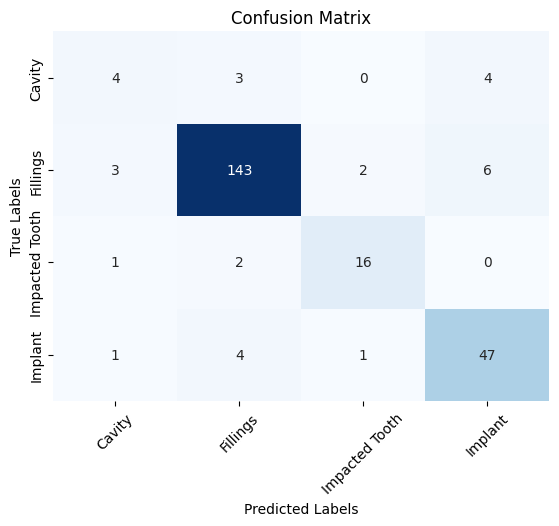

In [ ]:
# plotting the confusion matrix for that


from sklearn.metrics import confusion_matrix


# Compute the confusion matrix
cm = confusion_matrix(label_list_test, predicted_class_names)

# Define class names (adjust according to your specific class names)
class_names = ['Cavity', 'Fillings', 'Impacted Tooth', 'Implant']

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap from the confusion matrix
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

# Set x-axis tick labels
heatmap.set_xticklabels(class_names)
heatmap.set_yticklabels(class_names)

# Rotate x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Compute accuracy
accuracy = accuracy_score(label_list_test, predicted_class_names)
print("Accuracy:", accuracy)

# Compute precision, recall, and F1-score
report = classification_report(label_list_test, predicted_class_names, target_names=class_names)
print("Classification Report:")
print(report)


Accuracy: 0.8860759493670886
Classification Report:
                precision    recall  f1-score   support

        Cavity       0.44      0.36      0.40        11
      Fillings       0.94      0.93      0.93       154
Impacted Tooth       0.84      0.84      0.84        19
       Implant       0.82      0.89      0.85        53

      accuracy                           0.89       237
     macro avg       0.76      0.76      0.76       237
  weighted avg       0.88      0.89      0.88       237



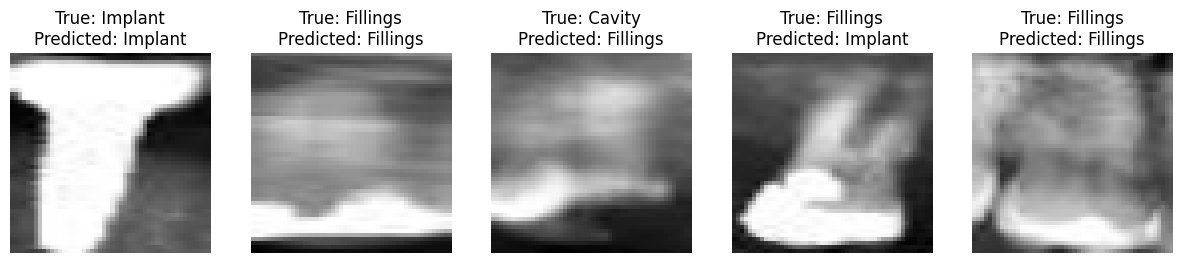

In [ ]:
import random

# Select random indices to display some examples
num_examples = 5
random_indices = random.sample(range(len(image_list_test)), num_examples)

# Plot the images with their ground truth and predicted labels
plt.figure(figsize=(15, 8))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(1, num_examples, i)
    plt.imshow(image_list_test[idx], cmap='gray')
    plt.title(f"True: {label_list_test[idx]}\nPredicted: {predicted_class_names[idx]}")
    plt.axis('off')
plt.show()
